In [52]:
#import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten,MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [53]:
#load data and split into train and test
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [54]:
#image shape
print(x_train.shape)      #we have 60000 rows of training set of 28x28 pixel image each
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [55]:
#image at index=0 in training set
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [56]:
#print the above image label
y_train[0]

5

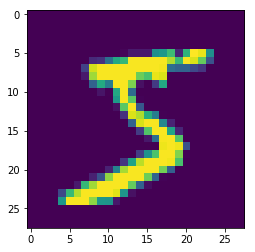

In [57]:
#show the image as a picture
plt.imshow(x_train[0])

In [58]:
#reshape the data to fit the model
x_train=x_train.reshape(60000,28,28,1)         ###cnn accept 4d (length,size,size,grayscale1/rgb3(depth))
x_test=x_test.reshape(10000,28,28,1)

In [59]:
#normalize
x_train=x_train/255
x_test=x_test/255

In [60]:
#one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [61]:
print(y_train_one_hot[0])           #represent the label "5"

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [62]:
#Build CNN model

model=Sequential()

#add model layers

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))                    ## REDUCE OVERFITTNG
model.add(Flatten())                         ##CONVERT 3D TO 1D
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
          
          

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [63]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
#train the model
hist = model.fit(x_train,y_train_one_hot,validation_data=(x_test,y_test_one_hot), epochs=10, batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.2649 - acc: 0.9190 - val_loss: 0.0552 - val_acc: 0.9825
Epoch 2/10
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.0932 - acc: 0.9718 - val_loss: 0.0426 - val_acc: 0.9862
Epoch 3/10
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.0690 - acc: 0.9791 - val_loss: 0.0362 - val_acc: 0.9875
Epoch 4/10
60000/60000 [==============================] - 116s 2ms/sample - loss: 0.0579 - acc: 0.9820 - val_loss: 0.0331 - val_acc: 0.9884
Epoch 5/10
60000/60000 [==============================] - 116s 2ms/sample - loss: 0.0495 - acc: 0.9843 - val_loss: 0.0290 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.0457 - acc: 0.9858 - val_loss: 0.0287 - val_acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.0399 - acc: 0.9869 - val_l

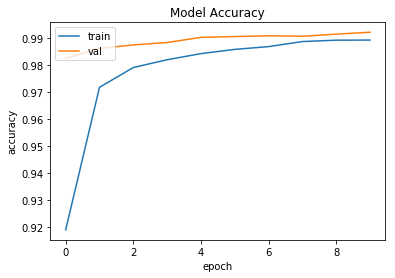

In [65]:
#visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

In [66]:
#predictions as probability of first 4 image in test set
predictions=model.predict(x_test[:4])
predictions

array([[1.46611090e-13, 2.18012639e-11, 1.26230851e-12, 1.72129290e-11,
        3.49364647e-15, 2.22189278e-14, 5.79323697e-22, 1.00000000e+00,
        1.45040162e-13, 2.36773275e-11],
       [4.19390998e-12, 1.02154840e-09, 1.00000000e+00, 1.15615269e-11,
        8.62326540e-13, 1.40206884e-13, 6.42054465e-11, 6.27060727e-14,
        2.39686421e-14, 2.37492521e-14],
       [2.24359820e-09, 9.99997258e-01, 4.02200016e-07, 6.84678270e-09,
        6.67506356e-07, 1.11509015e-08, 1.17291768e-06, 7.44292521e-08,
        3.36982311e-07, 9.15502074e-09],
       [9.99999404e-01, 2.95263203e-10, 8.47195036e-10, 7.79863604e-11,
        8.73685707e-11, 1.62512814e-09, 3.15503570e-07, 5.07875852e-10,
        4.21362989e-09, 2.64357794e-07]], dtype=float32)

In [67]:
#print our predictions as number labels

print(np.argmax(predictions,axis=1))

#print the actual labels

print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


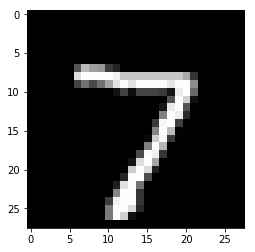

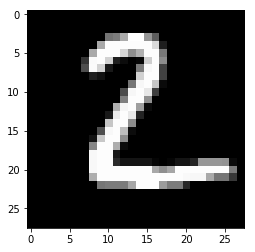

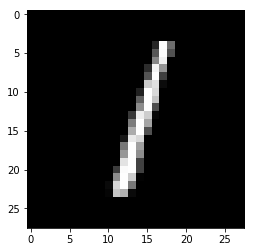

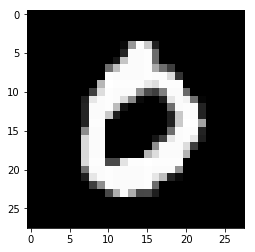

In [68]:
#show the first 4 images as pictures

for i in range(0,4):
    image=x_test[i]
    image = np.array(image)
    pixels = image.reshape((28,28))
    plt.imshow(pixels,cmap='gray')
    plt.show()

In [69]:
#evaluate the model
score = model.evaluate(x_test,y_test_one_hot, verbose=0)
print("test loss:", score[0])
print("test acc:", score[1])

test loss: 0.027298713622325887
test acc: 0.9922
